In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import date

def reward_fun(loads):
    reward = 0
    std = np.std(loads)
    for i in range(len(loads) -1):
        reward = reward - ((10 * (loads[i+1])**2) / len(loads))
    return reward

In [31]:
colors = ['#332288','#117733','#44AA99','#88CCEE','#DDCC77','#CC6677','#AA4499','#882255']

# TD3 vs LSTM-TD3 Plots 

### Load/plot data showing significance of LSTMs in turbulence control.

#### Data Loading

In [8]:
## LSTM-TD3
n_episodes = 201

filenames = ["LSTM-TD3/Case III (Load and Pressure)/Test 1/data_",
            "LSTM-TD3/Case III (Load and Pressure)/Test 2/data_",
            "LSTM-TD3/Case III (Load and Pressure)/Test 3/data_",
            "LSTM-TD3/Case III (Load and Pressure)/Test 4/data_",
            "LSTM-TD3/Case III (Load and Pressure)/Test 5/data_"]

n_examples = 5
rewards_lap = np.zeros((n_examples,n_episodes))
std_lap = np.zeros((n_examples,n_episodes))
peak_lap = np.zeros((n_examples,n_episodes))

for j in range(n_examples):
    for i in range(n_episodes):
        filename = filenames[j] + str(i+1) + ".npz"
        data = np.load(filename)
        lst = data.files
        loads = data[lst[-2]] * 5.0107 * 4.44822 
        std_lap[j,i] = np.std(loads)
        rewards_lap[j,i] = reward_fun(loads[:])


std_std_lap_mean = np.std(std_lap,axis=0)
std_lap_mean = np.mean(std_lap,axis=0)
rewards_lap_std = np.std(rewards_lap,axis=0)
full_rewards_lap = rewards_lap
rewards_lap = np.mean(rewards_lap,axis=0)

# TD3 
filenames = ["TD3/Test 1/data_",
            "TD3/Test 2/data_",
            "TD3/Test 3/data_",
            "TD3/Test 4/data_",
            "TD3/Test 5/data_"]

n_examples = 5
rewards_basic = np.zeros((n_examples,n_episodes))
std_basic = np.zeros((n_examples,n_episodes))

for j in range(n_examples):
    for i in range(n_episodes):
        filename = filenames[j] + str(i+1) + ".npz"
        data = np.load(filename)
        lst = data.files
        loads = data[lst[-2]] * 5.0107 * 4.44822 
        std_basic[j,i] = np.std(loads)
        rewards_basic[j,i] = reward_fun(loads[:])


std_std_basic_mean = np.std(std_basic,axis=0)
std_basic_mean = np.mean(std_basic,axis=0)
rewards_basic_std = np.std(rewards_basic,axis=0)
full_rewards_basic = rewards_basic
rewards_basic = np.mean(rewards_basic,axis=0)


###### Plotting rewards from episode 1 to 200 

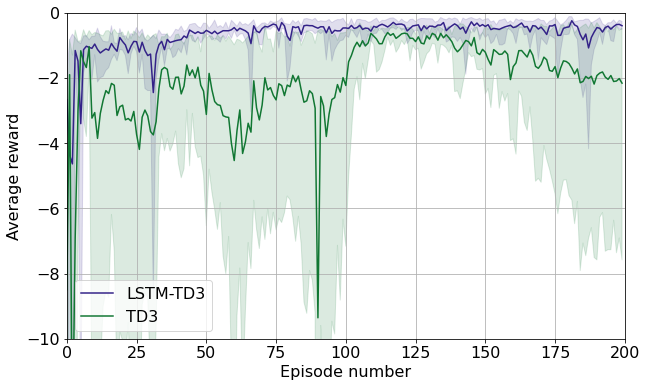

In [9]:

plt.figure(figsize=(10, 6))
# Plot main 
plt.plot(rewards_lap[:-1], color = colors[0])
plt.plot(rewards_basic[:-1], color = colors[1])
# Plot STD
plt.fill_between(range(n_episodes-1),np.min(full_rewards_lap[:,:-1],axis=0),np.max(full_rewards_lap[:,:-1],axis=0), alpha=0.15, color=colors[0])
plt.fill_between(range(n_episodes-1),np.min(full_rewards_basic[:,:-1],axis=0),np.max(full_rewards_basic[:,:-1],axis=0), alpha=0.15, color=colors[1])

today = date.today()
plt.ylabel('Average reward')
plt.xlabel('Episode number')

plt.grid(True)
plt.axis([0, 200,-10, 0])
plt.legend(['LSTM-TD3', 'TD3'])

#print(loads)
font_size = 16
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 
plt.rcParams.update({'font.size': font_size})
plt.savefig('Rewards_LSTM_TD3_v_TD3.png', dpi=300)



##### Std of lift plots

LSTM-TD3:
Mean std of lift: 0.17605233535128875
Std of std of lift: 0.011195104602668576
TD3:
Mean std of lift: 0.26644838911919466
Std of std of lift: 0.07916264498169087


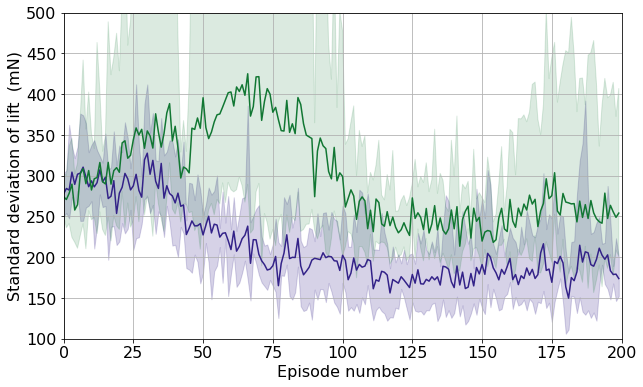

In [13]:
plt.figure(figsize=(10, 6))


plt.plot(std_lap_mean[:-1]*1000, color=colors[0])
plt.fill_between(range(n_episodes-1),np.min(std_lap[:,:-1],axis=0)*1000,np.max(std_lap[:,:-1],axis=0)*1000, alpha=0.2, color=colors[0])

plt.plot(std_basic_mean[:-1]*1000, color=colors[1])
plt.fill_between(range(n_episodes-1),np.min(std_basic[:,:-1],axis=0)*1000,np.max(std_basic[:,:-1],axis=0)*1000, alpha=0.15, color=colors[1])


today = date.today()
plt.ylabel('Standard deviation of lift  (mN)')
plt.xlabel('Episode number')

plt.grid(True)
plt.xlim([0,200])
plt.ylim([100,500])

font_size = 16
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 
plt.rcParams.update({'font.size': font_size})
plt.savefig('STD_LSTM_TD3_v_TD3.png', dpi=300)

print('LSTM-TD3:')
print('Mean std of lift:', std_lap_mean[-1])
print('Std of std of lift:', std_std_lap_mean[-1])

print('TD3:')
print('Mean std of lift:', std_basic_mean[-1])
print('Std of std of lift:', std_std_basic_mean[-1])


##### 

# Significance of flow information plots

##### Data loading...

In [15]:
filenames = ["LSTM-TD3/Case I (Load)/Test 1/data_",
            "LSTM-TD3/Case I (Load)/Test 2/data_",
            "LSTM-TD3/Case I (Load)/Test 3/data_",
            "LSTM-TD3/Case I (Load)/Test 4/data_",
            "LSTM-TD3/Case I (Load)/Test 5/data_"]

n_examples = 5
n_episodes = 201
rewards_load = np.zeros((n_examples,n_episodes))
rewards_load_std = np.zeros(n_episodes)
std_load = np.zeros((n_examples,n_episodes))

for j in range(n_examples):
    for i in range(n_episodes):
        filename = filenames[j] + str(i+1) + ".npz"
        data = np.load(filename)
        lst = data.files
        loads = data[lst[-2]] * 5.0107 * 4.44822
        std_load[j,i] = np.std(loads)
        rewards_load[j,i] = reward_fun(loads[:])

std_std_load_only = np.std(std_load,axis=0)
std_load_only = np.mean(std_load,axis=0)
rewards_load_std = np.std(rewards_load,axis=0)
full_rewards_load = rewards_load
rewards_load = np.mean(rewards_load,axis=0)

filenames = ["LSTM-TD3/Case II (Pressure)/Test 1/data_",
            "LSTM-TD3/Case II (Pressure)/Test 2/data_",
            "LSTM-TD3/Case II (Pressure)/Test 3/data_",
            "LSTM-TD3/Case II (Pressure)/Test 4/data_",
            "LSTM-TD3/Case II (Pressure)/Test 5/data_"]
n_examples = 5
rewards_pressure = np.zeros((n_examples,n_episodes))
std_pressure = np.zeros((n_examples, n_episodes))

for j in range(n_examples):
    for i in range(n_episodes):
        filename = filenames[j] + str(i+1) + ".npz"
        data = np.load(filename)
        lst = data.files
        loads = data[lst[-2]] * 5.0107 * 4.44822
        std_pressure[j,i] = np.std(loads)
        rewards_pressure[j,i] = reward_fun(loads[:])


std_pressure_only = np.mean(std_pressure,axis=0)    
std_std_pressure_only = np.std(std_pressure,axis=0)
rewards_pressure_std = np.std(rewards_pressure,axis=0)
full_rewards_pressure = rewards_pressure
rewards_pressure = np.mean(rewards_pressure,axis=0)


filenames = ["LSTM-TD3/Case III (Load and Pressure)/Test 1/data_",
            "LSTM-TD3/Case III (Load and Pressure)/Test 2/data_",
            "LSTM-TD3/Case III (Load and Pressure)/Test 3/data_",
            "LSTM-TD3/Case III (Load and Pressure)/Test 4/data_",
            "LSTM-TD3/Case III (Load and Pressure)/Test 5/data_"]

n_examples = 5
rewards_lap = np.zeros((n_examples,n_episodes))
std_lap = np.zeros((n_examples,n_episodes))

for j in range(n_examples):
    for i in range(n_episodes):
        filename = filenames[j] + str(i+1) + ".npz"
        data = np.load(filename)
        lst = data.files
        loads = data[lst[-2]] * 5.0107 * 4.44822
        std_lap[j,i] = np.std(loads)
        rewards_lap[j,i] = reward_fun(loads[:])
        
std_std_lap_mean = np.std(std_lap,axis=0)
std_lap_mean = np.mean(std_lap,axis=0)
rewards_lap_std = np.std(rewards_lap,axis=0)
full_rewards_lap = rewards_lap
rewards_lap = np.mean(rewards_lap,axis=0)



In [16]:
print('Case I (Load)')
print('Mean std of lift:', std_load_only[-1])
print('Std of std of lift:',np.std(std_load[:,-1]))

print('Case II (Pressure)')
print('Mean std of lift:', std_pressure_only[-1])
print('Std of std of lift:',np.std(std_pressure[:,-1]))

print('Case III (Load and Pressure)')
print('Mean std of lift:', std_lap_mean[-1])
print('Std of std of lift:', np.std(std_lap[:,-1]))




Case I (Load)
Mean std of lift: 0.19111014519055078
Std of std of lift: 0.020254472949565998
Case II (Pressure)
Mean std of lift: 0.19903453471426985
Std of std of lift: 0.03268773576827605
Case III (Load and Pressure)
Mean std of lift: 0.17605233535128875
Std of std of lift: 0.011195104602668576


### Plotting reward curves...

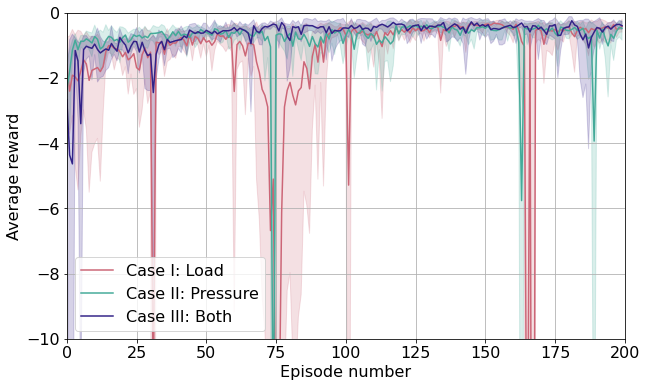

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(rewards_load[:-1], color=colors[5])
plt.plot(rewards_pressure[:-1], color = colors[2])
plt.plot(rewards_lap[:-1], color = colors[0])

plt.fill_between(range(n_episodes-1),np.min(full_rewards_load[:,:-1],axis=0),np.max(full_rewards_load[:,:-1],axis=0), alpha=0.2, color=colors[5])
plt.fill_between(range(n_episodes-1),np.min(full_rewards_pressure[:,:-1],axis=0),np.max(full_rewards_pressure[:,:-1],axis=0), alpha=0.2, color=colors[2])
plt.fill_between(range(n_episodes-1),np.min(full_rewards_lap[:,:-1],axis=0),np.max(full_rewards_lap[:,:-1],axis=0), alpha=0.2, color=colors[0])


today = date.today()
plt.ylabel('Average reward')
plt.xlabel('Episode number')
plt.grid(True)
plt.axis([0, 200,-10, 0])

plt.legend(['Case I: Load', 'Case II: Pressure', 'Case III: Both'])

font_size = 16
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 
plt.rcParams.update({'font.size': font_size})
plt.savefig('Rewards_Measurements.png', dpi=300)



### Std of Lift Plots

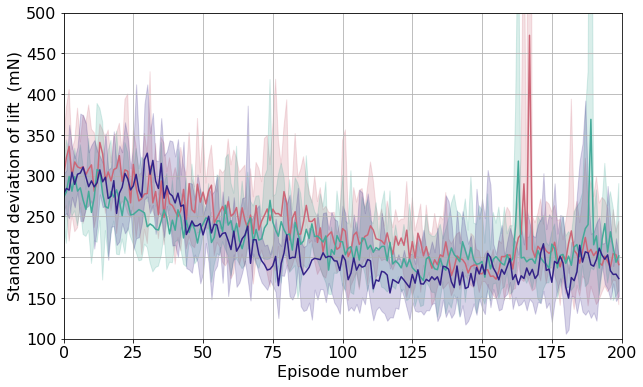

In [20]:

plt.figure(figsize=(10, 6))

plt.plot(std_load_only[:-1]*1000, color=colors[5])
plt.fill_between(range(n_episodes-1),np.min(std_load[:,:-1], axis=0)*1000,np.max(std_load[:,:-1],axis=0)*1000, alpha=0.2, color=colors[5])

plt.plot(std_pressure_only[:-1]*1000, color=colors[2])
plt.fill_between(range(n_episodes-1),np.min(std_pressure[:,:-1],axis=0)*1000,np.max(std_pressure[:,:-1],axis=0)*1000, alpha=0.2, color=colors[2])


plt.plot(std_lap_mean[:-1]*1000, color=colors[0])
plt.fill_between(range(n_episodes-1),np.min(std_lap[:,:-1],axis=0)*1000,np.max(std_lap[:,:-1],axis=0)*1000, alpha=0.2, color=colors[0])

plt.ylabel('Standard deviation of lift  (mN)')
plt.xlabel('Episode number')
plt.grid(True)
plt.xlim([0,200])
plt.ylim([100,500])

font_size = 16
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 
plt.rcParams.update({'font.size': font_size})
plt.savefig('STD_Measurements.png', dpi=300)


## Accessing PID/Passive Data

#### PID

In [25]:
filenames = ["PID/data_"]

n_examples = 1
n_episodes = 5

std_PID = np.zeros((n_examples,n_episodes))

for j in range(n_examples):
    for i in range(n_episodes):
        filename = filenames[j] + str(i+1) + ".npz"
        data = np.load(filename)
        lst = data.files
        actions = data[lst[2]]
        loads = data[lst[-2]] * 5.0107 * 4.44822
        std_PID[j,i] = np.std(loads)

print('PID')
print('Mean std of lift:', np.mean(std_PID[0,:]))
print('Std of std of lift:',np.std(std_PID[0,:]))


PID
Mean std of lift: 0.26381125688116064
Std of std of lift: 0.006442594760311528


#### Passive

In [28]:
filenames = ["Passive/data_"]

n_examples = 1
n_episodes = 5

std_passive = np.zeros((n_examples,n_episodes))
mean_passive = np.zeros((n_examples, n_episodes))

for j in range(n_examples):
    for i in range(n_episodes):
        filename = filenames[j] + str(i+1) + ".npz"
        data = np.load(filename)
        lst = data.files
        actions = data[lst[2]]
        loads = data[lst[-2]] * 5.0107 * 4.44822
        std_passive[j,i] = np.std(loads)

print('PID')
print('Mean std of lift:', np.mean(std_passive[0,:]))
print('Std of std of lift:',np.std(std_passive[0,:]))


PID
Mean std of lift: 0.305209283861942
Std of std of lift: 0.020337657986206147


# Hotwire Data 

#### Plotting spectrum data

[[0.00000e+00 0.00000e+00]
 [1.22070e-01 4.96106e-02]
 [2.44141e-01 6.49866e-02]
 ...
 [4.99634e+02 1.52632e-05]
 [4.99756e+02 1.24124e-05]
 [4.99878e+02 8.36888e-06]]


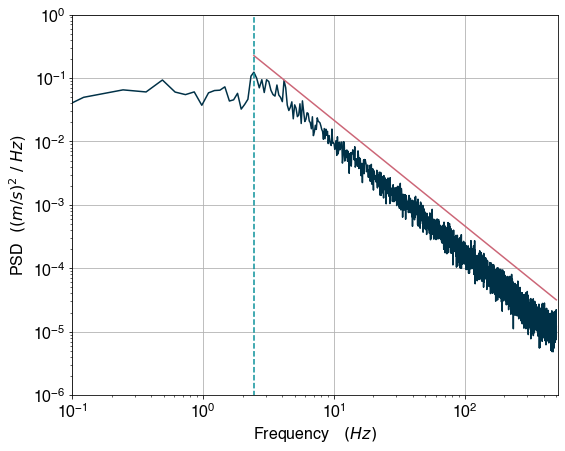

In [29]:
plt.figure(figsize=(9, 7))
data = pd.read_csv('fft_8192.csv')
data = data.to_numpy(dtype='float32')

print(data)
plt.plot(data[:,0],data[:,1],color='#003147')
plt.plot(data[20:,0],data[20:,0]**(-5/3), color='#CC6677')
plt.plot([2.44,2.44],[10^-7, 1], color='#089099',linestyle='--')
plt.yscale('log')
plt.xscale('log')
plt.axis([0.1, 518, 10**(-6), 1])

plt.ylabel('PSD$ \ \  ((m/s)^2 \  /  \ Hz$)')
plt.xlabel('Frequency $ \ \   (Hz)$')
plt.grid(True)
plt.gcf().subplots_adjust(left=0.15)

font_size = 16

plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 
plt.rcParams.update({'font.size': font_size})
plt.savefig('frequency_spectrum.png', dpi=300)
